# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Helper functions

In [3]:
def unique(dataset):
    for i in dataset:
        unique = dataset[i].unique()
        print(f'Unique Items: {unique}| Length: {len(unique)}')

In [4]:
object = []
def object_identifier(dataset):
    for name, type in dataset.dtypes.items():
        if type == 'object':
            object.append(name)
    return object
    

In [5]:
label_encoder = LabelEncoder()
def label(dataset, lst):
    for i in lst:
        dataset[i] = label_encoder.fit_transform(dataset[i])
    return dataset

# Data

In [6]:
data = pd.read_csv('playground-series-s3e2/train.csv')

In [7]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [8]:
data.shape

(15304, 12)

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [10]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
unique(data)

Unique Items: [    0     1     2 ... 15301 15302 15303]| Length: 15304
Unique Items: ['Male' 'Female' 'Other']| Length: 3
Unique Items: [2.80e+01 3.30e+01 4.20e+01 5.60e+01 2.40e+01 3.40e+01 5.30e+01 7.80e+01
 4.50e+01 6.20e+01 5.10e+01 4.00e+00 2.30e+01 3.60e+01 5.90e+01 4.00e+01
 4.70e+01 3.10e+01 1.72e+00 7.10e+01 5.00e+01 5.50e+01 3.80e+01 5.70e+01
 1.20e+01 6.10e+01 4.80e+01 1.70e+01 5.80e+01 2.60e+01 8.00e+00 2.00e+00
 3.90e+01 5.20e+01 1.90e+01 5.40e+01 7.20e+01 1.50e+01 1.10e+01 7.60e+01
 8.20e+01 1.80e+01 7.40e+01 4.30e+01 2.10e+01 6.50e+01 9.00e+00 8.00e+01
 6.80e+01 4.40e+01 3.20e+01 7.00e+00 2.50e+01 7.90e+01 6.30e+01 5.00e+00
 8.10e+01 1.00e+01 3.00e+00 6.00e+01 4.90e+01 3.20e-01 6.00e+00 7.00e+01
 7.30e+01 2.00e+01 4.60e+01 3.70e+01 6.70e+01 2.90e+01 6.90e+01 1.32e+00
 3.00e+01 1.40e+01 7.50e+01 2.20e+01 2.70e+01 7.70e+01 3.50e+01 6.60e+01
 1.80e+00 1.88e+00 8.80e-01 1.30e+01 1.48e+00 4.10e+01 6.40e+01 1.30e+00
 1.60e-01 8.00e-01 1.60e+01 1.64e+00 1.40e+00 6.40e-01 4.00e-

In [12]:
object_identifier(data)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [13]:
label(data, object)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,28.0,0,0,1,2,1,79.53,31.1,2,0
1,1,1,33.0,0,0,1,2,0,78.44,23.9,1,0
2,2,0,42.0,0,0,1,2,0,103.00,40.3,0,0
3,3,1,56.0,0,0,1,2,1,64.87,28.8,2,0
4,4,0,24.0,0,0,0,2,0,73.36,28.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,0,22.0,0,0,0,0,1,72.63,19.5,2,0
15300,15300,0,46.0,1,0,1,2,1,101.19,32.1,2,0
15301,15301,0,75.0,0,0,1,3,1,87.69,26.2,2,0
15302,15302,1,46.0,0,0,1,2,0,101.13,22.5,0,0


# EDA

In [14]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='age'>

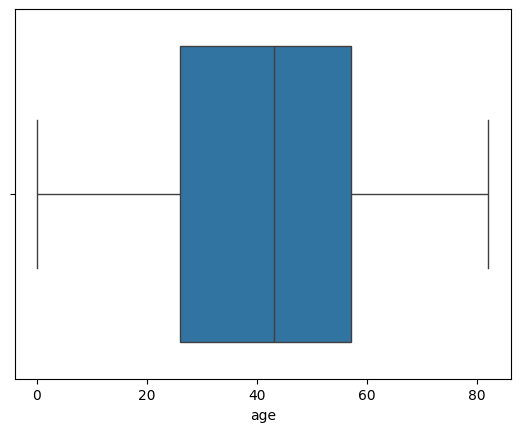

In [15]:
sns.boxplot(data=data, x=data['age'])

<Axes: xlabel='gender', ylabel='age'>

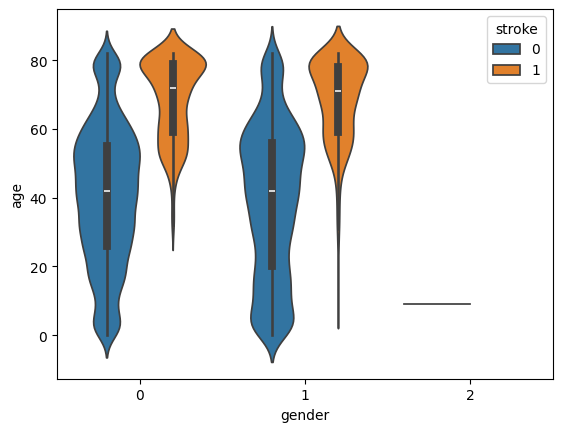

In [16]:
sns.violinplot(data=data, x=data['gender'], y=data['age'], hue='stroke')

<Axes: xlabel='stroke', ylabel='percent'>

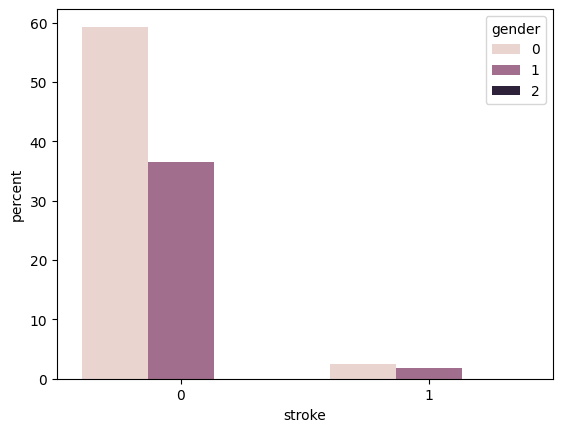

In [17]:
sns.countplot(data=data, x=data['stroke'], hue='gender', stat='percent')

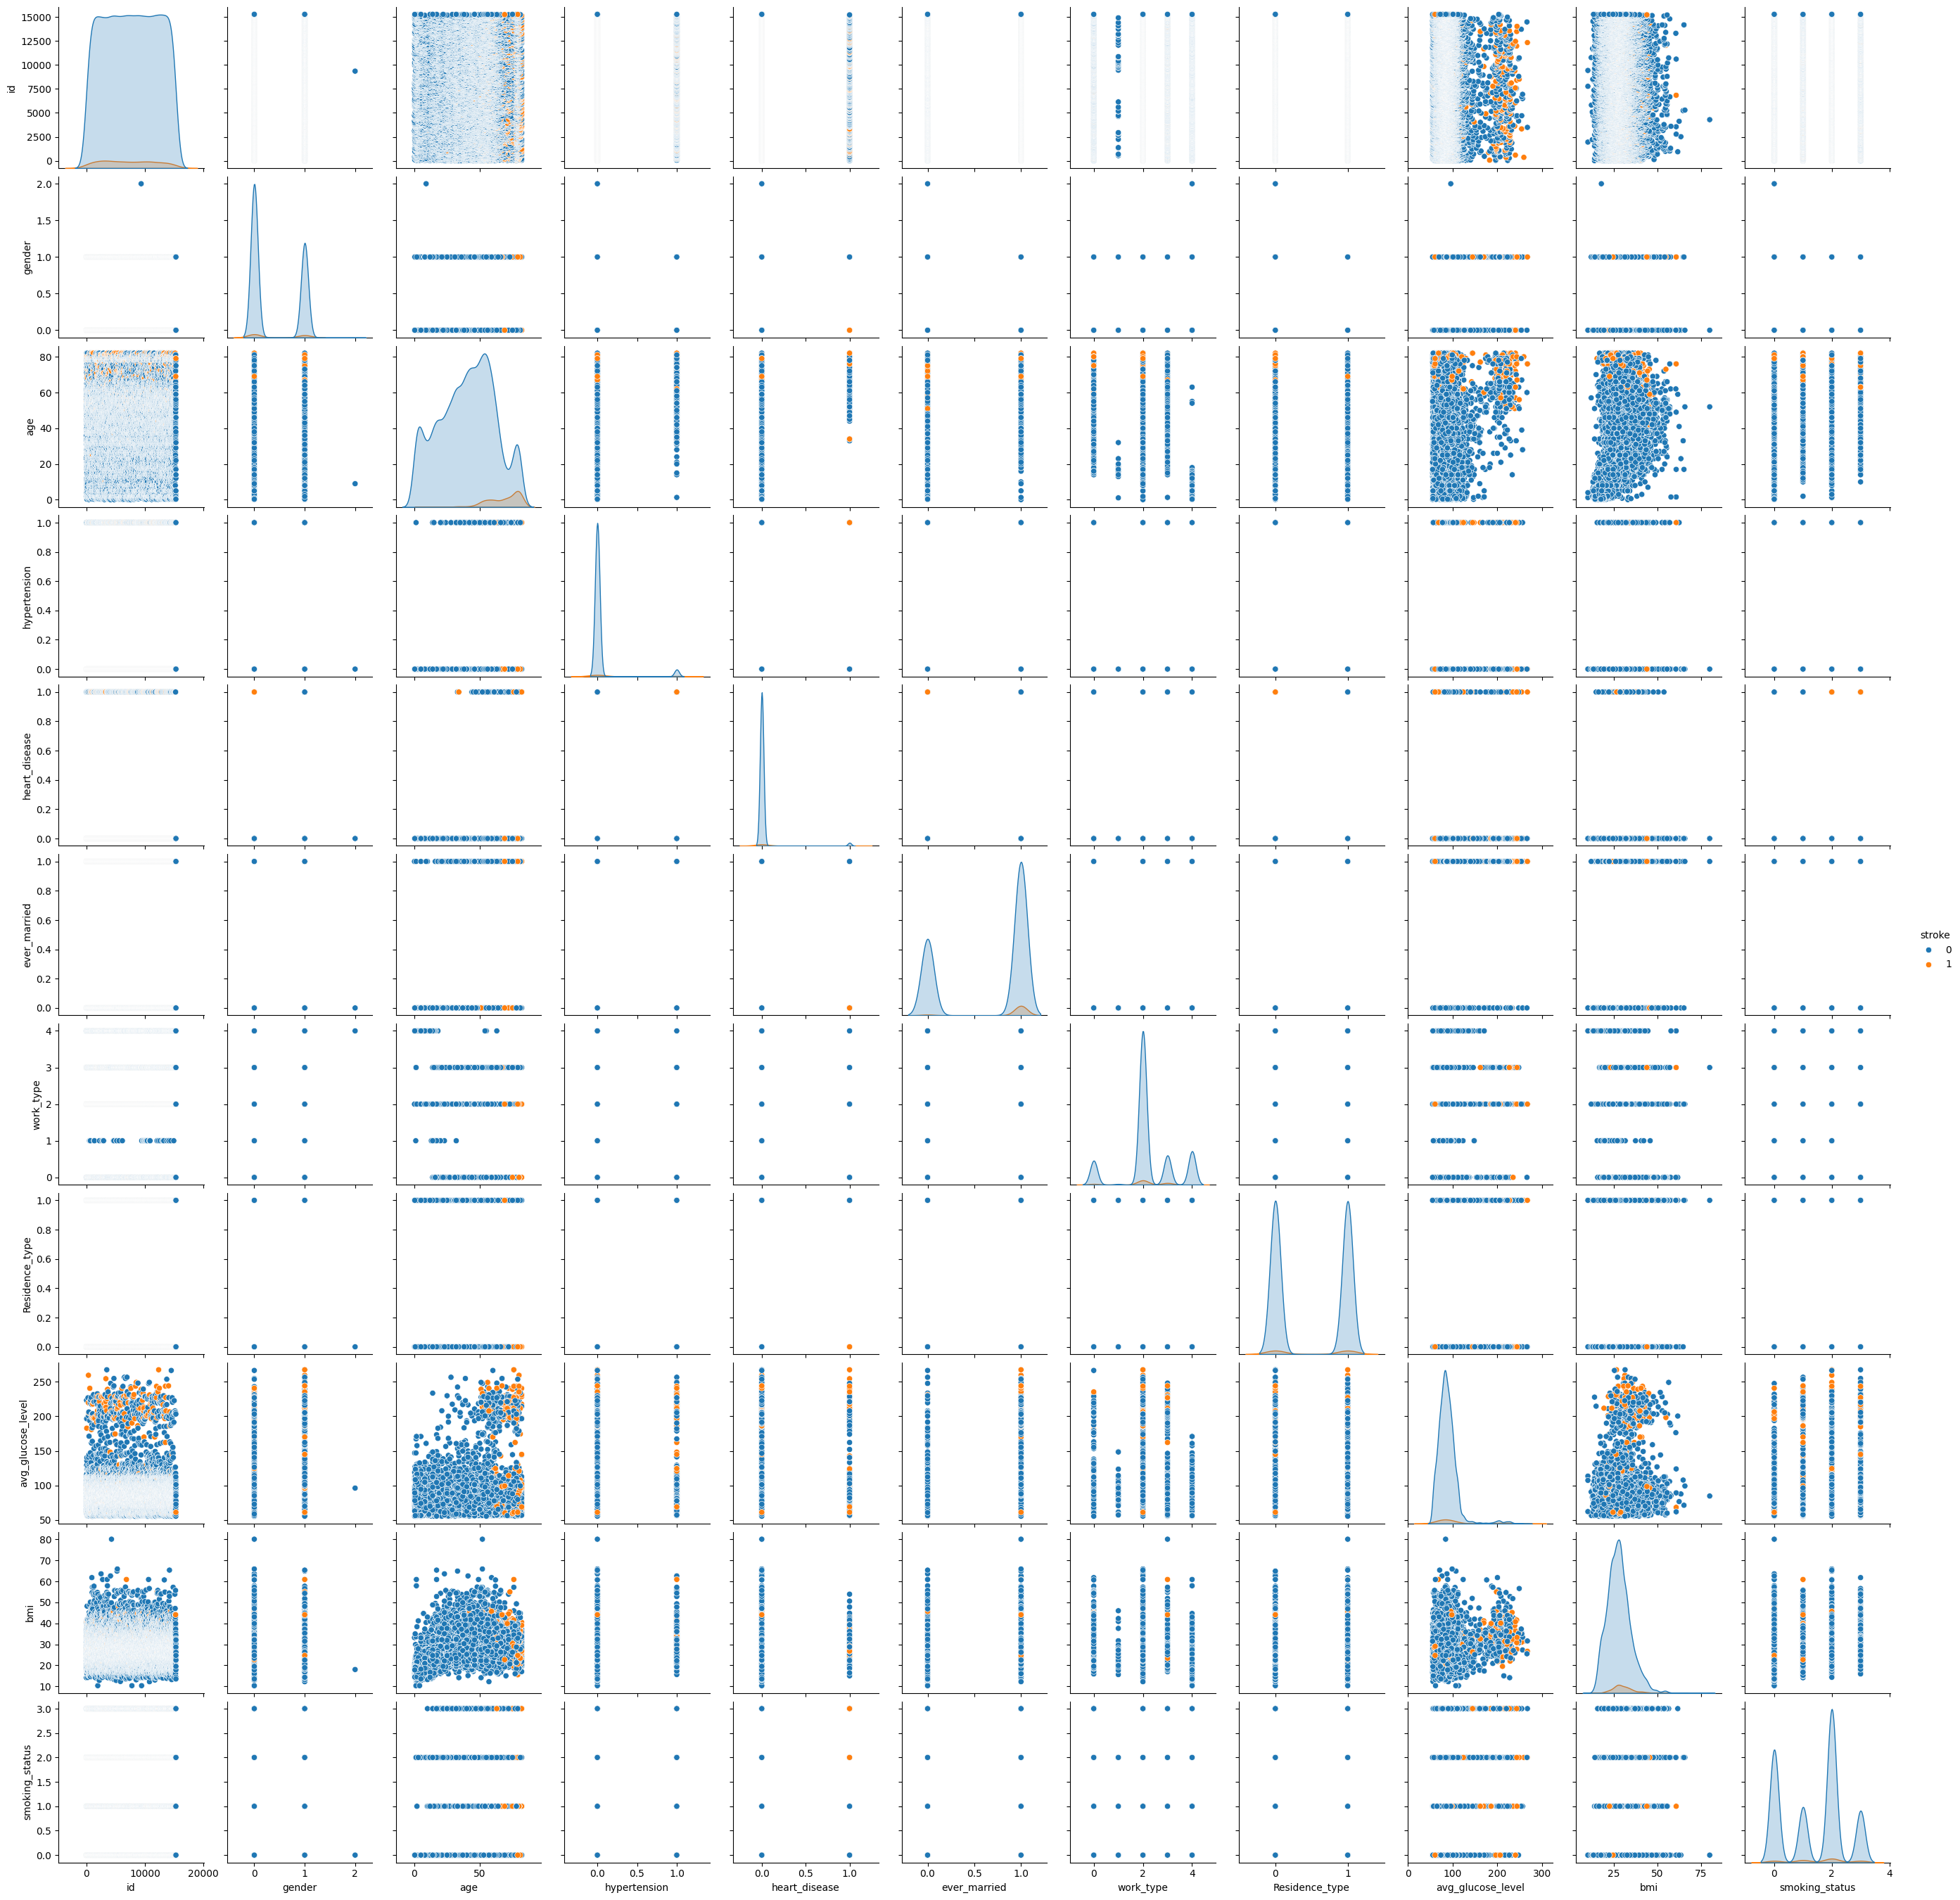

In [18]:
sns.pairplot(data=data, hue='stroke')

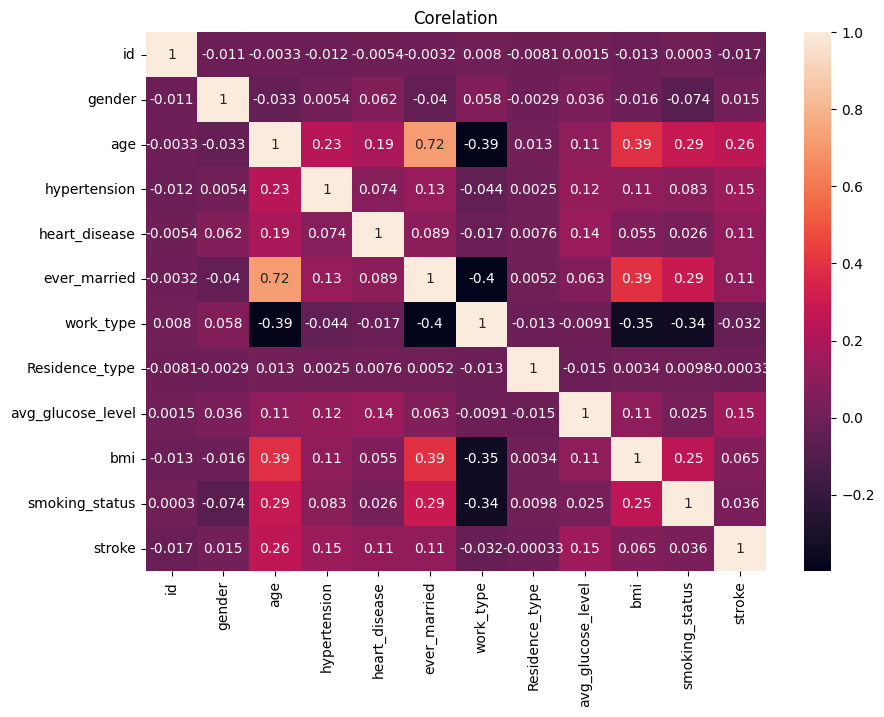

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Corelation')
plt.show()

# Feature Engineering 

In [19]:
x = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10712, 10), (4592, 10), (10712,), (4592,))

# Model Building

In [22]:
model = RandomForestRegressor()

In [23]:
model_1 = LinearRegression()

In [24]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
model_1.fit(x_train, y_train)

LinearRegression()

In [26]:
model.score(x_test, y_test)

0.1144749873675952

In [27]:
model_1.score(x_test, y_test)

0.09740885556684498

# Test phase

In [28]:
test = pd.read_csv('playground-series-s3e2/test.csv')
test_copy = test.copy()

In [29]:
object_identifier(test)

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [30]:
label(test_copy, object)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,0,57.0,0,0,1,2,0,82.54,33.4,0
1,15305,1,70.0,1,0,1,2,1,72.06,28.5,0
2,15306,0,5.0,0,0,0,4,1,103.72,19.5,0
3,15307,0,56.0,0,0,1,0,1,69.24,41.4,3
4,15308,1,32.0,0,0,1,2,0,111.15,30.1,3
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,0,27.0,0,0,0,2,1,75.77,17.6,2
10200,25504,1,49.0,0,0,1,2,1,102.91,26.7,0
10201,25505,0,3.0,0,0,0,4,0,104.04,18.3,0
10202,25506,1,31.0,0,0,1,2,1,82.41,28.7,2


In [31]:
x = test_copy.drop(['id'], axis=1)

In [33]:
predict = model.predict(x)

In [34]:
predict

array([0.01, 0.09, 0.  , ..., 0.  , 0.  , 0.  ])

In [35]:
test = test.reset_index()
ids = test.pop('id')
output = pd.DataFrame({'id': ids,
                       'stroke': predict.squeeze()})
output.head()

,id,stroke
0,15304,0.01
1,15305,0.09
2,15306,0.00
3,15307,0.13
4,15308,0.00


# Submission file

In [36]:
submission = 'submit.csv'
output.to_csv(submission, index=False)

In [37]:
output = pd.read_csv('submit.csv')
output.head()

,id,stroke
0,15304,0.01
1,15305,0.09
2,15306,0.00
3,15307,0.13
4,15308,0.00
